## Fundamentals of Statistics Class: Exercises Solutions  
#### This notebook contains the full exercise solutions in R for the Fundamentals of Statistics Workshop covering topics on data exploration and statistics. Each exercise has specific objectives split into separate labeled cell blocks. How to generate basic data summaries, histograms, boxplots, conduct hypothesis tests of mean and variance, and ANOVA are covered using the provided datasets.

In [1]:
#Import required libraries for all exercises
suppressMessages(library(ggplot2))
suppressMessages(library(readxl))
options(repr.plot.width=7, repr.plot.height=6)

---

### Exercise 0

**Business Question:** A dataset has been shared. Import that dataset and gain basic information about it by answering the following:

* How many rows and columns does it have?
* What are the names of the columns and their data types?
* What does some of the data look like?
* What are some of the characteristics of the data?
* What are the value counts of a specific column?

In [2]:
#Ex0- Read the data from the excel file and create a dataframe
ex0 <- read_xlsx('../Datasets/VAV 3-06 & 4-06 1stHalf.xlsx')
#ex0 <- read_xlsx('../Datasets/VAV_EventFrames_Stats_Class.xlsx') #second dataset, uncomment and re-run to evaluate new data

In [3]:
#Ex0- How many rows and columns does it have?
dim(ex0) # Overall dimensions
nrow(ex0) # Number of rows
ncol(ex0) # Number of columns

[1] 58  3

[1] 58

[1] 3

In [4]:
#Ex0- What are the names of the columns and their data types?
str(ex0)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	58 obs. of  3 variables:
 $ Start.time: POSIXct, format: "2017-03-15 07:01:00" "2017-04-03 07:00:00" ...
 $ VAV Unit  : chr  "VAVCO 3-06" "VAVCO 3-06" "VAVCO 3-06" "VAVCO 3-06" ...
 $ RmTemp    : num  73.5 74 73 73 73 75 74.5 75 74.5 74 ...


In [5]:
#Ex0- What does some of the data look like?
head(ex0)

Start.time,VAV Unit,RmTemp
2017-03-15 07:01:00,VAVCO 3-06,73.5
2017-04-03 07:00:00,VAVCO 3-06,74.0
2017-04-04 07:04:00,VAVCO 3-06,73.0
2017-04-05 07:01:00,VAVCO 3-06,73.0
2017-04-06 07:08:00,VAVCO 3-06,73.0
2017-05-01 07:04:00,VAVCO 3-06,75.0


In [6]:
#Ex0- What are some of the characteristics of the data?
summary(ex0)

   Start.time                    VAV Unit             RmTemp     
 Min.   :2017-03-15 07:01:00   Length:58          Min.   :73.00  
 1st Qu.:2017-05-03 05:39:00   Class :character   1st Qu.:73.00  
 Median :2017-06-09 05:24:00   Mode  :character   Median :73.50  
 Mean   :2017-05-24 12:48:24                      Mean   :73.86  
 3rd Qu.:2017-06-20 05:20:00                      3rd Qu.:74.38  
 Max.   :2017-07-03 04:11:00                      Max.   :78.00  

In [7]:
#Ex0- What are the value counts of a specific column?
table(ex0$RmTemp) #RmTemp is the column of interest in first dataset, comment out for first dataset
#table(ex0$Setpoint.reached) #Setpoint.reached is the column of interest in second dataset, uncomment for second dataset


  73 73.5   74 74.5   75 75.5   78 
  24    8   11    5    5    3    2 

---

### Exercise 1

**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.

* Create a histogram to visualize the overall distribution of tolerances over the entire part
* Using histograms for each location, assess the location effect of the tolerance measurements
* Evaluate the effect of bin size on result

In [8]:
#Ex1- Read the data from the excel file and create a dataframe
ex1 <- read_xlsx('../Datasets/Tolerance Stack.xlsx')
head(ex1)

LOC,TOL
LOC 01,0.04020000
LOC 02,0.03780000
LOC 03,0.04993333
LOC 04,0.03673333
LOC 05,0.03046667
LOC 06,0.03046667


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


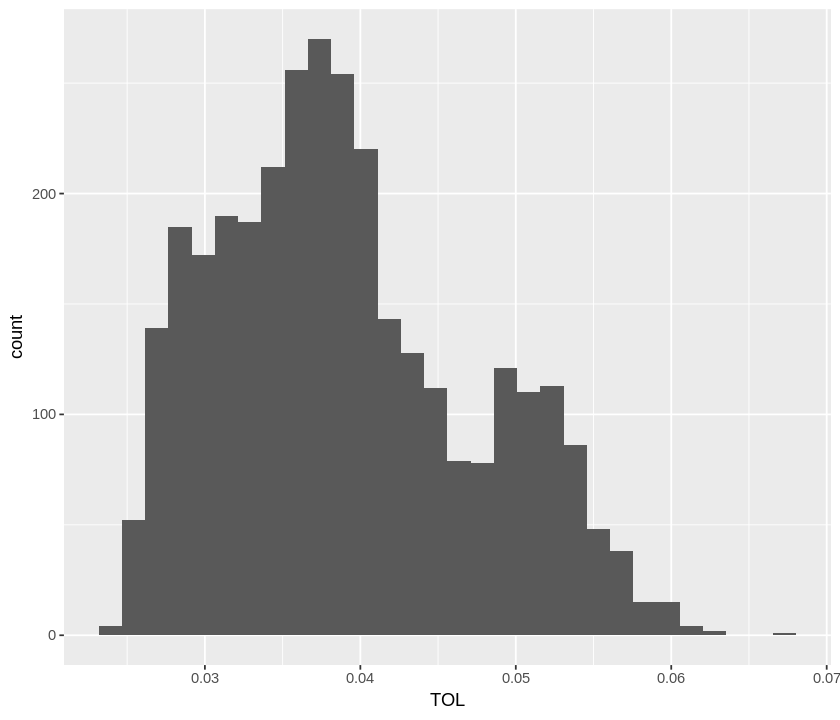

In [9]:
#Ex1- Create a histogram to visualize the overall distribution of tolerances over the entire part
ggplot(data = ex1, aes(TOL)) + geom_histogram()

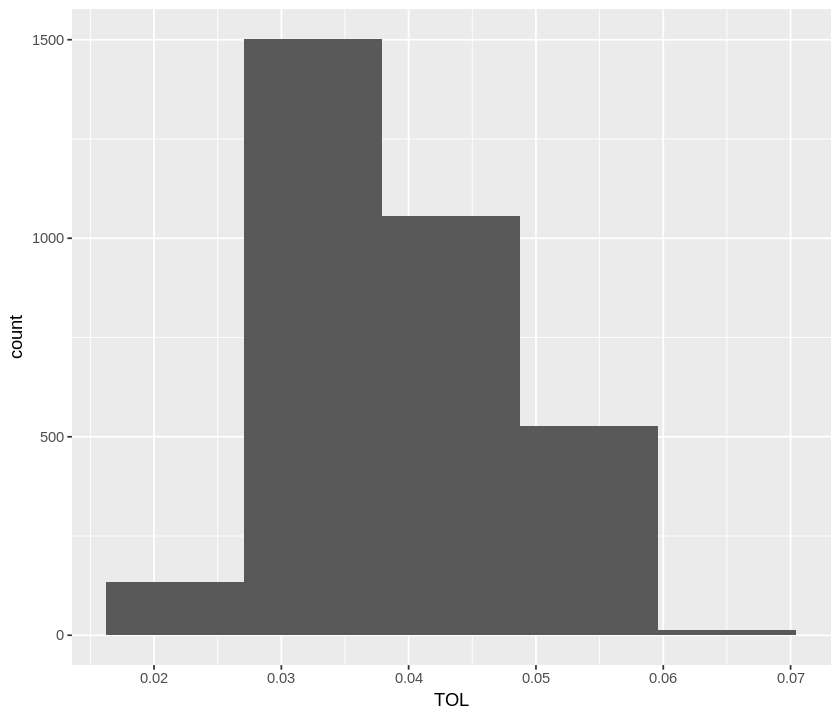

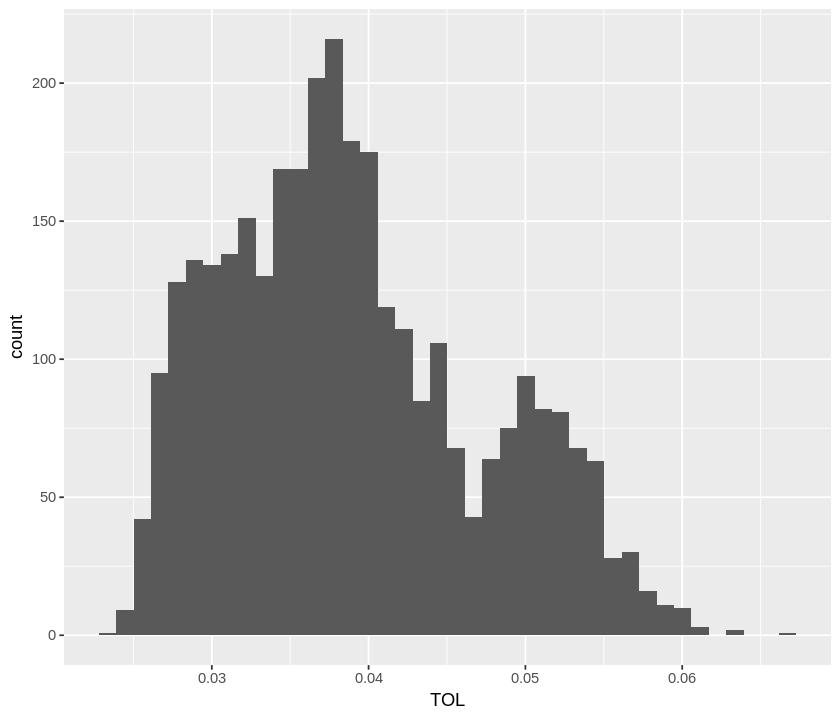

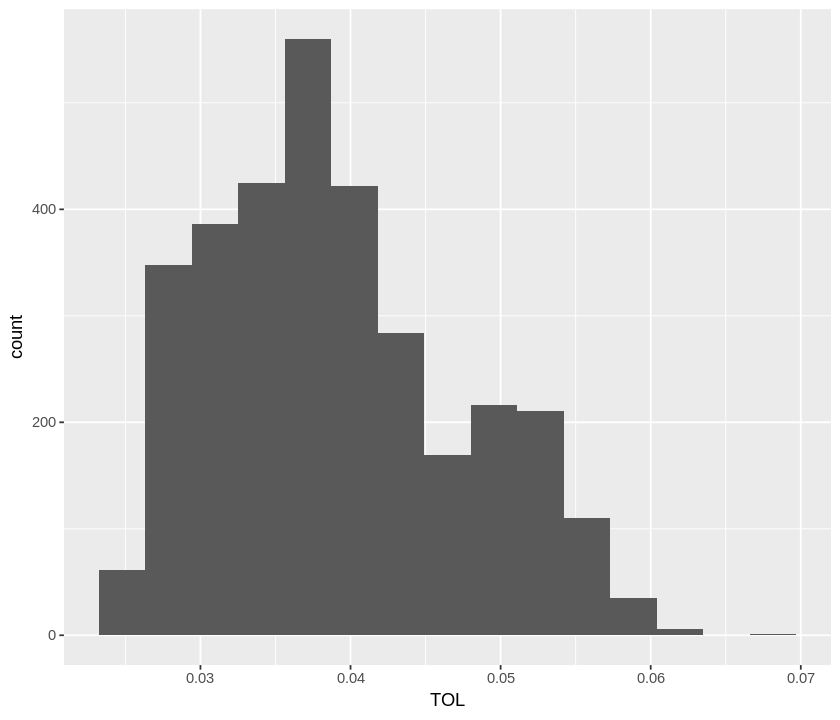

In [10]:
#Ex1- Evaluate the effect of bin size on result
for (b in c(5,40,15)) {
    print(ggplot(ex1, aes(TOL)) + geom_histogram(bins = b))
}

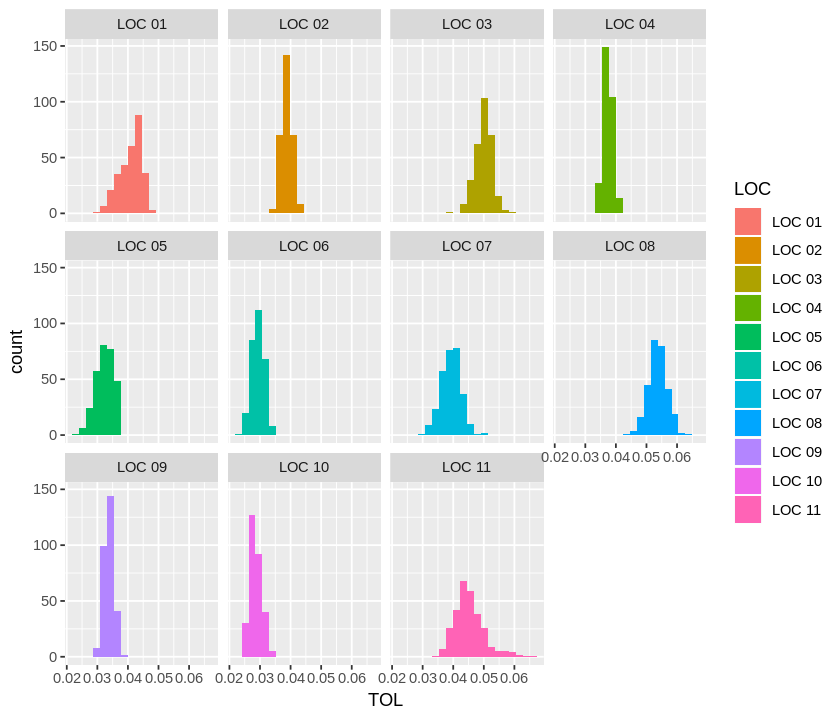

In [11]:
#Ex1- Using histograms for each location, assess the location effect of the tolerance measurements
ggplot(ex1, aes(TOL)) + geom_histogram(aes(fill=LOC), bins = 20) + facet_wrap(~LOC)

---

### Exercise 2 - Boxplots

**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.

* Create a Boxplot to visualize the overall distribution of tolerances over the entire part
* Using boxplots for each location, assess the location effect of the tolerance measurements

In [12]:
#Ex2- Data was already read from the excel file and a dataframe called ex1 created in Ex1
head(ex1)

LOC,TOL
LOC 01,0.04020000
LOC 02,0.03780000
LOC 03,0.04993333
LOC 04,0.03673333
LOC 05,0.03046667
LOC 06,0.03046667


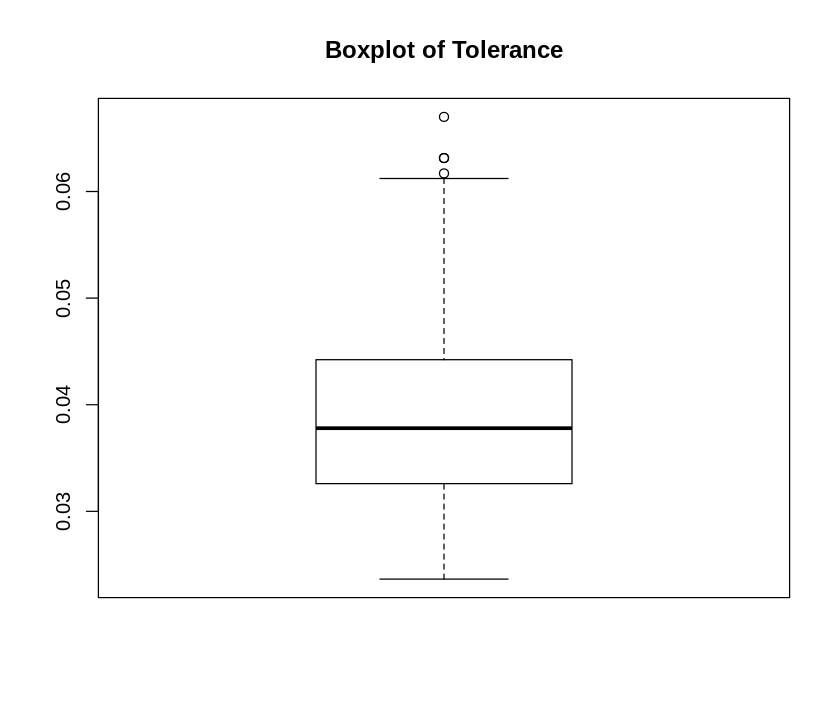

In [13]:
#Ex2- Create a Boxplot to visualize the overall distribution of tolerances over the entire part
boxplot(ex1$TOL, main="Boxplot of Tolerance") # This is the base boxplot function

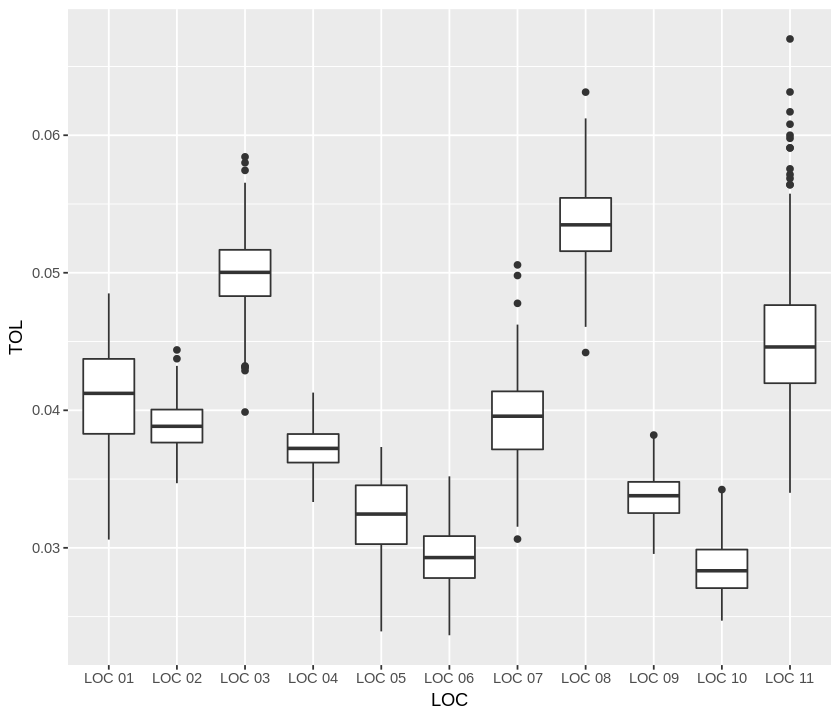

In [14]:
#Ex2- Using boxplots for each location, assess the location effect of the tolerance measurements
ggplot(ex1, aes(LOC, TOL)) + geom_boxplot()

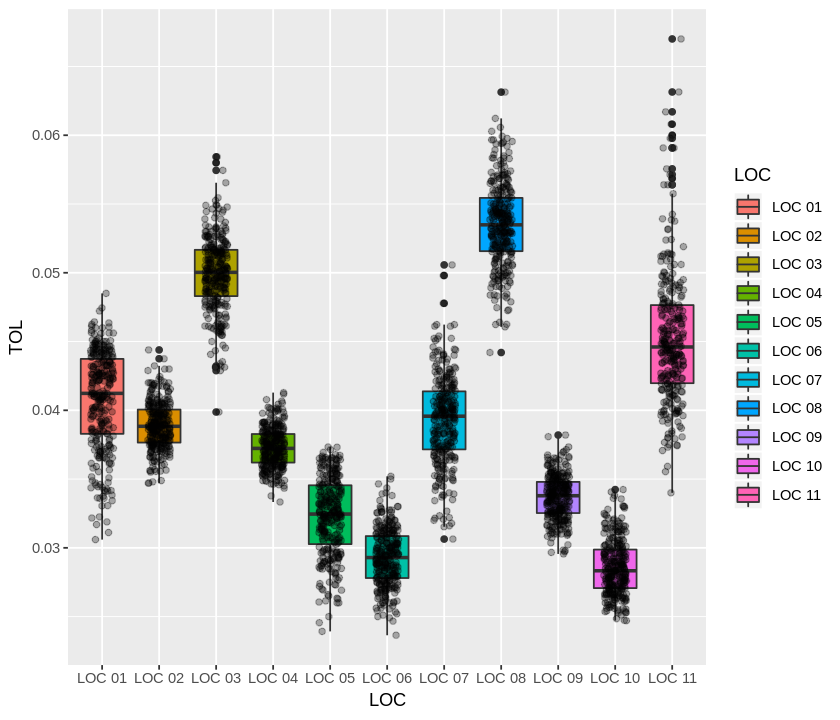

In [15]:
#Ex2 - Optional - Adding overlayed points and colour
ggplot(ex1, aes(LOC, TOL)) + geom_boxplot(aes(fill=LOC)) + geom_jitter(width = 0.2, alpha=0.3) 

---

### Exercise 3
**Business Question:** Historically, metal elongation has averaged 2% ($\mu_0=2$) with a known $\sigma^2=0.03$. Examine the current data set (Elongation.xlsx) to determine if the sample is statistically different than the historically expected value.
* Conduct a one-sided z-test at $\alpha=.05$ to evaluate the null and alternate hypotheses:
$$
H_0 : \mu \le \mu_0 \\
H_a : \mu \ge \mu_0
$$

In [16]:
#Ex3- Read the data from the excel file and create a dataframe
ex3 <- read_xlsx('../Datasets/Elongation.xlsx')
head(ex3)

Elongation
2.42
2.09
2.17
1.91
2.50
1.99


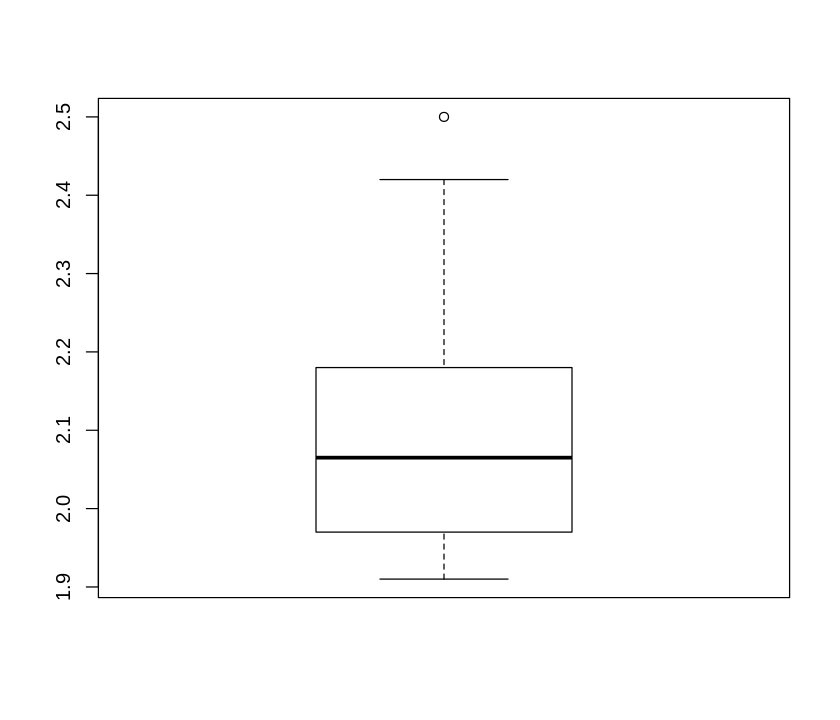

In [17]:
#Ex3- Visualize the data as a boxplot
boxplot(ex3)

In [18]:
mu0 = 2
n = nrow(ex3)

zscore = (mean(ex3$Elongation) - mu0) / (sqrt(.03/n))
pvalue= 1-pnorm(abs(zscore))
sprintf('Z-score = %.4f', zscore)
sprintf('p-value = %.4f', pvalue)

[1] "Z-score = 2.2805"

[1] "p-value = 0.0113"

**Interpretation:** Since $p<.05$, we reject $H_0$ at the $\alpha=.05$ level. There is sufficient evidence to show that the mean elongation is greater than 2 percent.

---

### Exercise 4
**Business Question:** Coating thickness of tablets in a drug manufacturing process (Thickness.xlsx) must meet a specification of $\mu=40$. $\sigma^2$ is assumed to be *UNKNOWN*. 
* Conduct a hypothesis test at $\alpha$ = 0.05 (95% confidence interval) to determine if $H_0$: $\mu$=40 is an acceptable hypothesis:
$$
H_0: \mu=\mu_0 \\
\text{vs}\\
H_a: \mu \ne \mu_0
$$

In [19]:
#Ex4- Read the data from the excel file and create a dataframe
ex4 <- read_xlsx('../Datasets/Thickness.xlsx')
head(ex4)

Tablet,Coating thickness
1,39.04
2,39.05
3,39.09
4,38.92
5,39.04
6,39.13


In [20]:
#Ex4- Conduct a hypothesis test
result <- t.test(ex4$`Coating thickness`, mu = 40, alternative = "two.sided")
print(result)


	One Sample t-test

data:  ex4$`Coating thickness`
t = -10.159, df = 29, p-value = 4.612e-11
alternative hypothesis: true mean is not equal to 40
95 percent confidence interval:
 39.25518 39.50482
sample estimates:
mean of x 
    39.38 



**Interpretation:** Since $p<.05$, we reject $H_0$ at the $\alpha=.05$ level. There is sufficient evidence to show that the mean thickness is not 40.

---

### Exercise 5: 
**Business Question:** We want to determine information about the mean coating thickness of tablets in a drug manufacturing process (Thickness.xlsx).
* Construct a 95% confidence interval (range of values for which we can be 95% certain contain the true mean of the tablets, $\mu$);  $\sigma^2$ is assumed to be *UNKNOWN*.

In [21]:
#Ex5- Data was already read from the excel file and a dataframe called df created in Ex4
head(ex4)

Tablet,Coating thickness
1,39.04
2,39.05
3,39.09
4,38.92
5,39.04
6,39.13


In [22]:
#Ex5- Construct a 95% confidence interval for mu
# You can access the confidence interval part of the result from exercise 5
print(result$conf.int)

[1] 39.25518 39.50482
attr(,"conf.level")
[1] 0.95


---

### Exercise 6
**Business Question:** Batch yield data (Tanks Stacked.xlsx) has been gathered from two reactor tanks in a chemical production process. We will test whether the Tanks produce the same mean yields after we do a comparison of the variances.
* Visually compare the tank data. Give some visual conclusions/conjectures
* Test the hypothesis that the variances are the same for both tanks
* Conduct the hypothesis test that the mean yields are the same

In [23]:
#Ex6- Read the data from the excel file and create a dataframe
ex6 <- read_xlsx('../Datasets/Tanks Stacked.xlsx')
head(ex6)

Batch,Tank,Yield
1,Tank A,39.04
1,Tank B,38.61
2,Tank A,39.05
2,Tank B,38.65
3,Tank A,39.09
3,Tank B,38.69


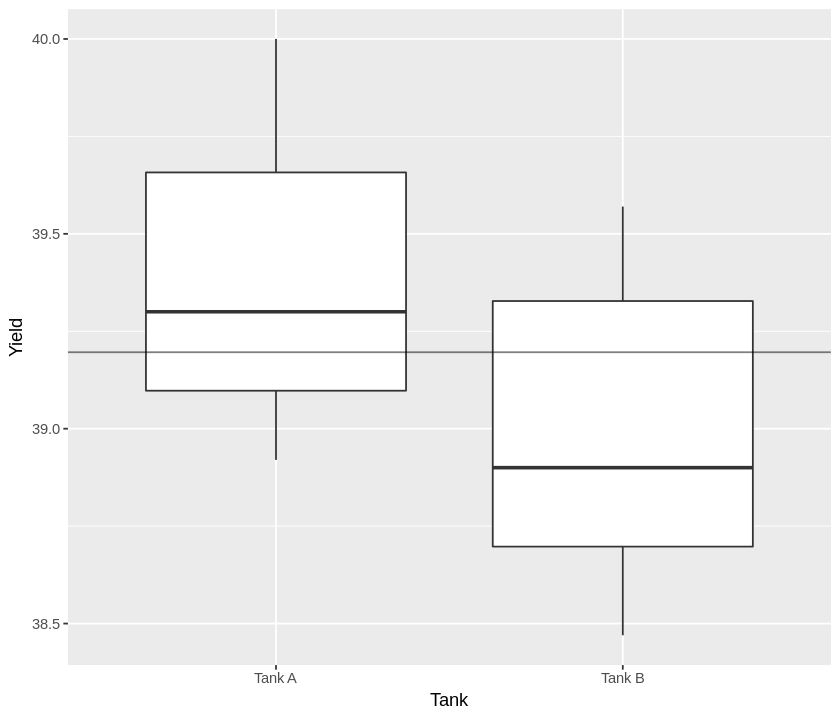

In [24]:
#Ex6- Visually compare the tank data. Give some visual conclusions/conjectures
# With geom_hline we are adding a horizontal line on the mean yield
ggplot(ex6, aes(Tank, Yield)) + geom_boxplot() + geom_hline(yintercept = mean(ex6$Yield), alpha = 0.5)

In [25]:
#Ex6- Test the hypothesis that the variances are the same for both tanks
var.test(Yield ~ Tank, data = ex6)


	F test to compare two variances

data:  Yield by Tank
F = 0.87885, num df = 29, denom df = 29, p-value = 0.7304
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4182996 1.8464512
sample estimates:
ratio of variances 
         0.8788457 


**Interpretation:** We cannot reject the null hypothesis (p-value > 0.05), so we accept that the variances are equal

In [26]:
#Ex6- Conduct the hypothesis test that the mean yields are the same
t.test(Yield ~ Tank, data = ex6, var.equal = T)


	Two Sample t-test

data:  Yield by Tank
t = 4.1201, df = 58, p-value = 0.0001218
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1890405 0.5462928
sample estimates:
mean in group Tank A mean in group Tank B 
            39.38000             39.01233 


**Interpretation:** We reject the null hypothesis (p-value < 0.05), so the mean yields are not the same

---

### Exercise 7
**Business Question:** 20 daily weight measurements are taken from metal production at two plants (Weights.xlsx). Are the mean daily weights from the plants different?

* Visually compare the North and South Plant weight data. Give some visual conclusions/conjectures.
* Test the hypothesis that the variances are the same for both plants. 
* Conduct the hypothesis test that the mean weights are the same  Η<sub>0</sub>: μ<sub>A</sub> - μ<sub>B</sub> = 0 vs Η<sub>1</sub>: μ<sub>A</sub> - μ<sub>B</sub> ≠ 0, assuming  unknown σ<sup>2</sup><sub>A</sub> ≠ σ<sup>2</sup><sub>B</sub>)

In [27]:
#Ex7- Read the data from the excel file and create a dataframe
ex7 <- read_xlsx('../Datasets/Weights.xlsx')
head(ex7)

Location,Weight
North,48.06
North,31.60
North,46.84
North,49.25
North,34.24
North,31.56


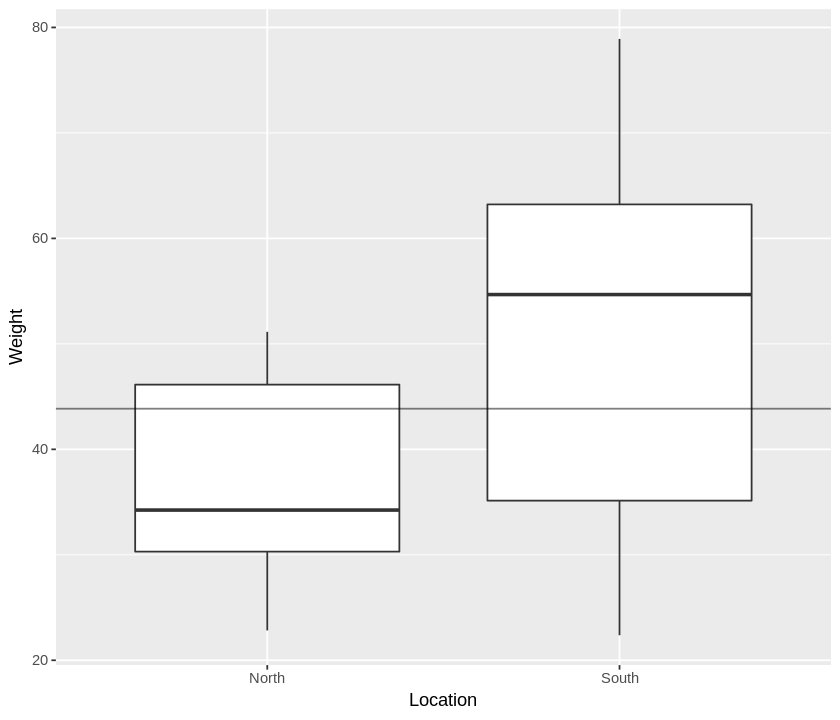

In [28]:
#Ex7- Visually compare the North and South Plant weight data. Give some visual conclusions/conjectures.
ggplot(ex7, aes(Location, Weight)) + geom_boxplot() + geom_hline(yintercept = mean(ex7$Weight), alpha = 0.5)

In [29]:
#Ex7- Test the hypothesis that the variances are the same for both plants
var.test(Weight ~ Location, data = ex7)


	F test to compare two variances

data:  Weight by Location
F = 0.33045, num df = 19, denom df = 19, p-value = 0.02004
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1307965 0.8348684
sample estimates:
ratio of variances 
         0.3304511 


**Interpretation:** We reject the null hypothesis (p-value < 0.05), so the variances are not equal

In [30]:
#Ex7- Conduct the hypothesis test that the mean weights are the same
t.test(Weight ~ Location, data = ex7, var.equal = F)


	Welch Two Sample t-test

data:  Weight by Location
t = -3.2365, df = 30.321, p-value = 0.002925
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.894347  -4.957653
sample estimates:
mean in group North mean in group South 
             37.137              50.563 


**interpretation:** We reject the null hypothesis (p-value < 0.05), so the mean weights are not the same for both plants

---

### Exercise 8: 
**Business Question:** We want to look at the relationship between velocity and strength in our welding data (Welding.xlsx).
* Plot welding data as a scatterplot
* Fit a regression line to determine if the regression coefficients are statistically significant. Fit "Strength" by "Velocity".

In [31]:
#Ex8- Read the data from the excel file and create a dataframe
ex8 <- read_xlsx('../Datasets/Welding.xlsx')
head(ex8)

velocity,strength
2.00,89
2.50,97
2.50,91
2.75,98
3.00,100
3.00,104


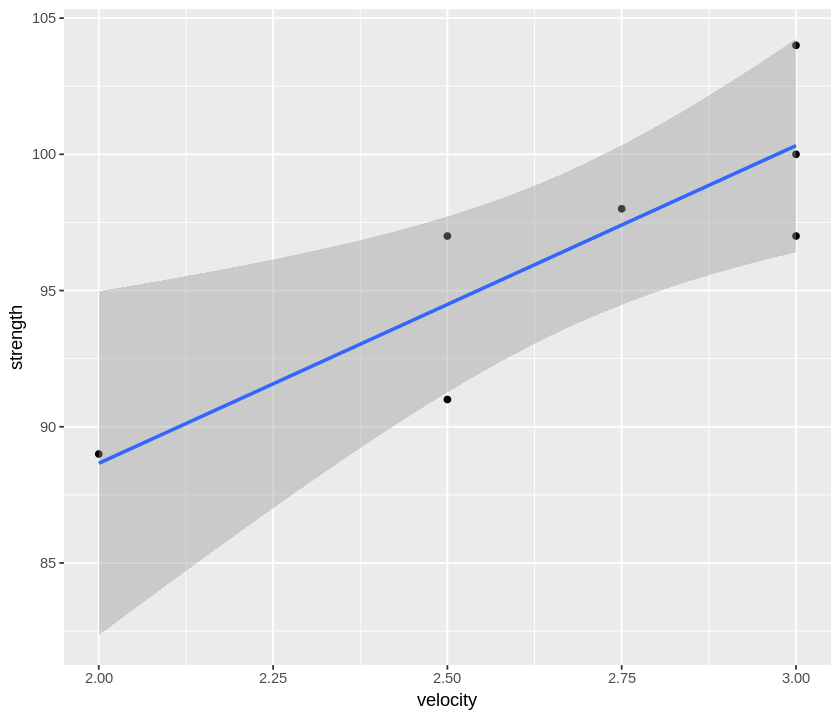

In [32]:
#Ex8- Plot welding data as a scatterplot, with fitted line and confidence intervals
ggplot(ex8, aes(velocity, strength)) + geom_point() + geom_smooth(method = "lm")

In [33]:
#Ex8- Fit a regression line to determine if the regression coefficients are statistically significant.
mod <- lm(strength ~ velocity, data = ex8)
summary(mod)


Call:
lm(formula = strength ~ velocity, data = ex8)

Residuals:
      1       2       3       4       5       6       7 
 0.3404  2.5106 -3.4894  0.5957 -0.3191  3.6809 -3.3191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   65.340      8.707   7.504 0.000665 ***
velocity      11.660      3.224   3.617 0.015275 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.954 on 5 degrees of freedom
Multiple R-squared:  0.7234,	Adjusted R-squared:  0.6681 
F-statistic: 13.08 on 1 and 5 DF,  p-value: 0.01527


**Interpretation:** The p-values of both the intercept and velocity coefficients are < 0.05 so we accept that the coefficients are statistically significant.

---

### Exercise 9
**Business Question:** Machine tolerance data (MachineTol.xlsx) was measured on a part at 5 locations: L1-L5. Conduct an analysis of variance of machine tolerance to determine if the population means associated with locations L1-L5 are the same or are different.
* Plot machine tolerance by location
* Show the results of an ANOVA and provide the conclusion to the hypothesis test
* Conduct a multiple comparison test to determine what pairs might be different using the All Pairs Tukey-Kramer HSD method. What means are different or not?
* Conduct a multiple comparison test to determine if a location exists that exhibits the best (lowest) mean tolerance using the Compare Best, Hsu MCB method. Are any of the means "best"?

In [10]:
#Ex9- Read the data from the excel file and create a dataframe
ex9 <- read_xlsx('../Datasets/MachineTol.xlsx')
head(ex9)

Location,Mach Tol
L1,0.03780000
L1,0.03853846
L1,0.03800000
L1,0.03972222
L1,0.04033333
L1,0.03860000


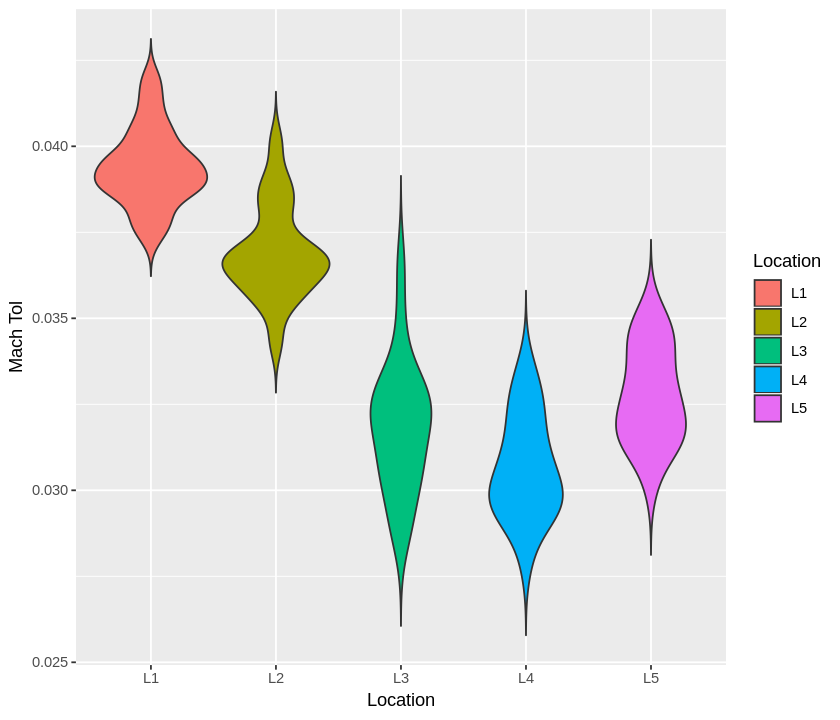

In [35]:
#Ex9- Plot machine tolerance by location
#using violinplot
ggplot(ex9, aes(Location, `Mach Tol`)) + geom_violin(aes(fill=Location), trim=F)

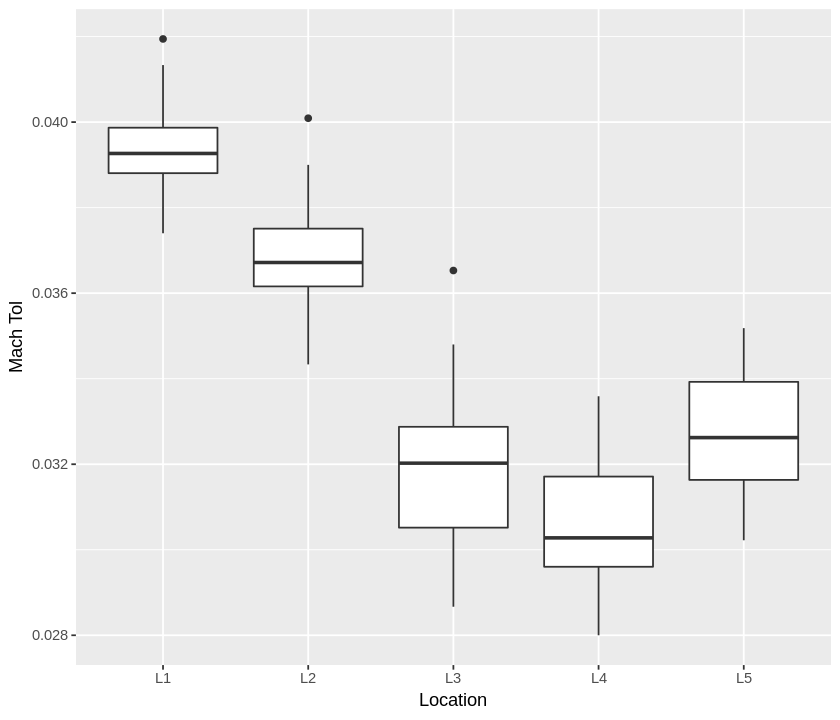

In [36]:
#Ex9- Plot machine tolerance by location
#using boxplot
ggplot(ex9, aes(Location, `Mach Tol`)) + geom_boxplot()

In [20]:
#Ex9- Show the results of an ANOVA and provide the conclusion to the hypothesis test
model_aov <- aov(`Mach Tol` ~ Location, data=ex9)
summary(model_aov)

            Df    Sum Sq   Mean Sq F value Pr(>F)    
Location     4 0.0010892 2.723e-04   123.4 <2e-16 ***
Residuals   95 0.0002096 2.210e-06                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = `Mach Tol` ~ Location, data = ex9)

$Location
              diff           lwr           upr     p adj
L2-L1 -0.002461592 -0.0037678473 -0.0011553365 0.0000094
L3-L1 -0.007538523 -0.0088447785 -0.0062322678 0.0000000
L4-L1 -0.008731839 -0.0100380942 -0.0074255835 0.0000000
L5-L1 -0.006634839 -0.0079410945 -0.0053285837 0.0000000
L3-L2 -0.005076931 -0.0063831866 -0.0037706759 0.0000000
L4-L2 -0.006270247 -0.0075765023 -0.0049639916 0.0000000
L5-L2 -0.004173247 -0.0054795026 -0.0028669918 0.0000000
L4-L3 -0.001193316 -0.0024995711  0.0001129397 0.0903469
L5-L3  0.000903684 -0.0004025713  0.0022099394 0.3119803
L5-L4  0.002097000  0.0007907444  0.0034032551 0.0002111



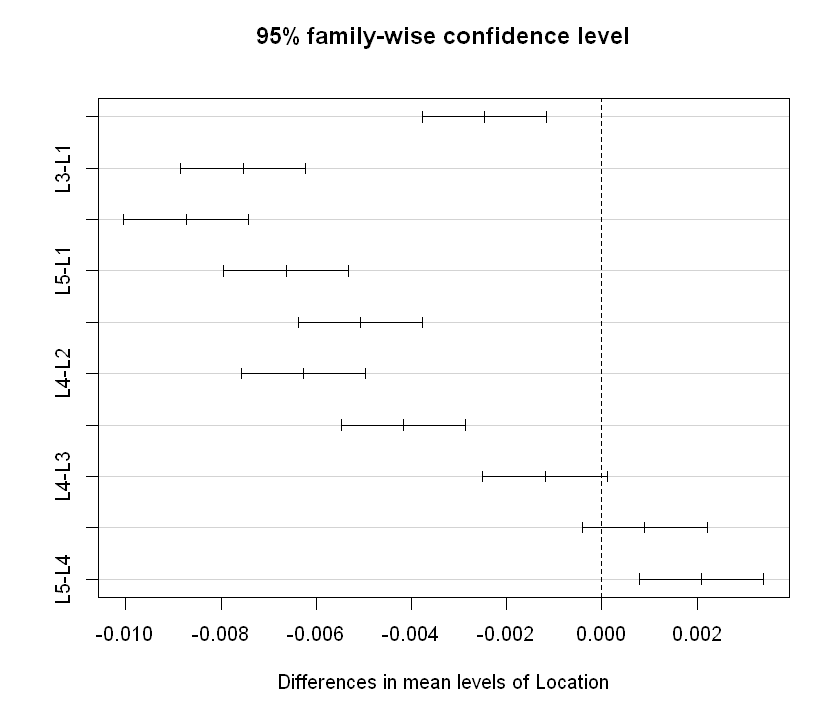

In [18]:
#Ex9- Conduct a multiple comparison test to determine what pairs might be different using the All Pairs 
#Tukey-Kramer HSD method. 

tukey_model <- TukeyHSD(model_aov) # Performs Tukey HSD test. REquires an aov object as input
print(tukey_model) # Prints results of Tukey HSD
plot(tukey_model) # Plots results of Tukey HSD

In [39]:
#Ex9- Use jmp to find the best location with Hsu's MCB method